In [1]:
# Step 1: Specify the path to the "experiment_analyses" folder in your system (after cloning the repo)
# This step is because I have a separate folder in the repo that contains the Jupyter Notebooks for organization purposes
import warnings
import os
experiment_analyses_dir = r"C:\Users\graci\Dropbox\PAndA\Thesis Experiment 1\scripts\experiment_analyses"  # Replace with your desired directory
os.chdir(experiment_analyses_dir)


# Step 2: Specify the location of file paths contain the main_data folder, track_piece_center folder, and the lane_deviation_data_folder
# I will share a Dropbox folder with you that contains these folders, so you can just copy and paste your file system file path to these
# Note that the files in these folders should be treated as immutable
import lane_deviation
import preprocess

SUBJECT_PATH = "C:/Users/graci/Dropbox/PAndA/Thesis Experiment 1/data/main_data" # Dropbox directory path that leads to the csv files for all subejcts across both familiar and unfamiliar group
TRACK_CENTER_PATH = "C:/Users/graci/Dropbox/PAndA/Thesis Experiment 1/data/track_piece_center" # Dropbox directory path that leads to csv files of center track pieces
LANE_DEVIATION_PATH = "C:/Users/graci/Dropbox/PAndA/Thesis Experiment 1/data/lane_deviation_data" # Dropbox directory path that leads to lane deviation data (I precomputed them ahead of time because it takes *forever* to calculate lane deviation per trial)

# These three dictionaries below each contain the following:
    # subject_dict: all keys are of each subject's id (e.g. "wad") and all values are of the subject_object (which will contain all the data for the subject)
    # master_dict: all keys are of each map (maps 1-10) and all values are of each set of track_piece objects (which contain the corrected track piece positions)
    # non_interp_dict: similar to master_dict, but the track_piece center dataframes contain less points/are lower resolution which might be useful 
warnings.filterwarnings("ignore")
subject_dict,master_dict,non_interp_dict = preprocess.run(SUBJECT_PATH, TRACK_CENTER_PATH, LANE_DEVIATION_PATH)

In [2]:
# Useful references -------------------------
familiar_group_ids = ["boss", "chunk", "cod", "depth", "froze", "omen", "scrub", "sweat", "tweet", "wad"] # wad was excluded because his csv files are fucked Dx
unfamiliar_group_ids = ["chess", "class", "dust", "envoy", "flint", "lurch", "maker", "point", "shack", "wool"]
trial_list = [0,1,2,3,4,5,6,7,8,9] # I use 0th based lists to index the trials 

# Pick a subject, and pick a trial number! -----------
subject_id = familiar_group_ids[5] # pick a subject#
trial_number = 9


In [3]:
# Get objects associated to a given subject and their trial
subject_object = subject_dict[subject_id]
trial_object = subject_object.trials[trial_number]

# Retrieve useful information
trial_map_number = trial_object.map.map_number # map number that subject drove in for a given trial
track_piece_list = trial_object.map.pieces # list of strings that denote the track pieces in the map
track_piece_object_dict = trial_object.pieces # dictionary that contains track_piece names and their associated track_piece_object instantiation

print(f" Map for Trial {trial_number}:","Map", trial_map_number,"\n","List of track pieces:","\n", track_piece_list) # high_visibility, then good. if low_visibility, that means the track piece has fog 



 Map for Trial 9: Map 1 
 List of track pieces: 
 ['straight_long', 'u_turn_long', 'left_turn_short', 'left_turn_long', 'straight_short', 'left_turn_med', 'right_turn_short', 's_turn_short']


In [4]:
# To get all the data of a given trial and subject!

# Get dataframe to view csv in Python
camera_position_df = trial_object.paths["main_camera"]
vehicle_position_df = trial_object.paths["vehicle_movement"]
main_vehicle_vars_df = trial_object.paths["Vehicle_DrivingSim"]

# Get file paths directly (specific to your directory)
path_to_csv = f"{subject_object.path}/S001/trackers"
camera_position_path = f"{path_to_csv}/main_camera"
vehicle_position_path = f"{path_to_csv}/vehicle_movement"
main_vehicle_vars_path = f"{path_to_csv}/Vehicle_DrivingSim"


In [5]:
# Examine steering angle data for a given trial
t1 = main_vehicle_vars_df["steering_angle"]
print(max(list(t1)))
print(t1.mean())
print(t1.std())

26.932
0.8001242853253471
7.10980524871676


In [22]:
# To get data associated to a given track piece! These are dataframes that are filtered for only the data associated to a given track piece
track_piece_id = track_piece_list[7] # choose a track piece from the list 
track_piece_object = track_piece_object_dict[track_piece_id] # get the track piece object associated to the track piece

# Determine if there was fog on that track piece (you may not want to train on track pieces that contain fog)
print(" Track Piece ID:",track_piece_id,"\n","Visibility condition:", track_piece_object.visibility) # high_visibility, then good. if low_visibility, that means the track piece has fog 

# If it's a no-fog track piece, then get the dataframes for it
track_dataframe_dict = track_piece_object.dataframes
track_camera_position_df = track_dataframe_dict["main_camera"]
track_vehicle_position_df = track_dataframe_dict["vehicle_movement"]
track_main_vehicle_vars_df = track_dataframe_dict["Vehicle_DrivingSim"]


# If you want to get the corrected positions of a given track piece and the trajectory of the subject:
track_piece_center_x, track_piece_center_z, track_piece_traj_x, track_piece_traj_z = lane_deviation.get_track_piece_of_interest(subject_object,trial_number,master_dict,track_piece_id)


 Track Piece ID: s_turn_short 
 Visibility condition: None


In [23]:
import numpy as np
lane_dev_df = track_piece_object.lane_dev_df
print(list(lane_dev_df["lane_dev"]))
print(np.mean(lane_dev_df["lane_dev"]))

[-1.8609808499577234, -1.9503404639553241, -1.8324201378762341, -1.850289233017423, -1.8127385060617651, -1.8305668610761219, -1.7924836736989456, -1.810277715589483, -1.760968314314104, -1.7783811190389192, -1.7391861792229761, -1.756285992665893, -1.7166948554978387, -1.7335433725084874, -1.681898393837722, -1.6984935733623778, -1.6578529297450457, -1.6747416082547746, -1.6376050706400525, -1.6564755922820356, -1.617227452387902, -1.7104933269032427, -1.586159938010933, -1.6052723058052112, -1.5654068658705254, -1.5845636334026827, -1.5447958085309919, -1.6406874910791636, -1.514536658300338, -1.534757239072532, -1.4951610935921131, -1.5159825575978294, -1.476718682965489, -1.5775084931011767, -1.4511978162132957, -1.4739565932550895, -1.4358231180108336, -1.4592121490576326, -1.4220830956882355, -1.4464582056475215, -1.4046588541526892, -1.4304763298942338, -1.3954681887202163, -1.4222052910235534, -1.3881288907022997, -1.4155697539336691, -1.380535766903272, -1.4091884046015482, -1

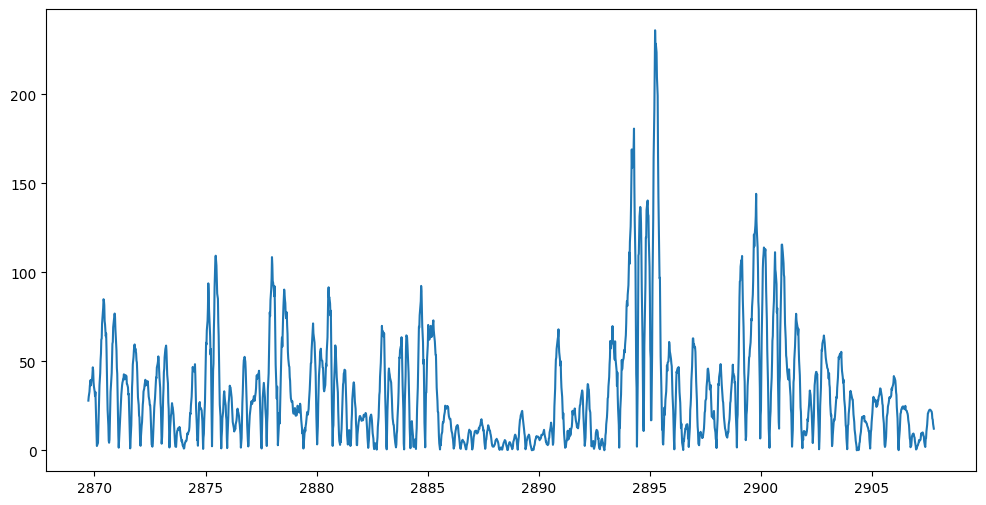

In [24]:
driving_sim_df = track_piece_object.dataframes["Vehicle_DrivingSim"]

acceleration_column = driving_sim_df["steering_acceleration"]
time_column = driving_sim_df["time"]
angle_column = driving_sim_df["steering_angle"]


import matplotlib.pyplot as plt
    
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(time_column,driving_sim_df['steering_acceleration'])
plt.show()

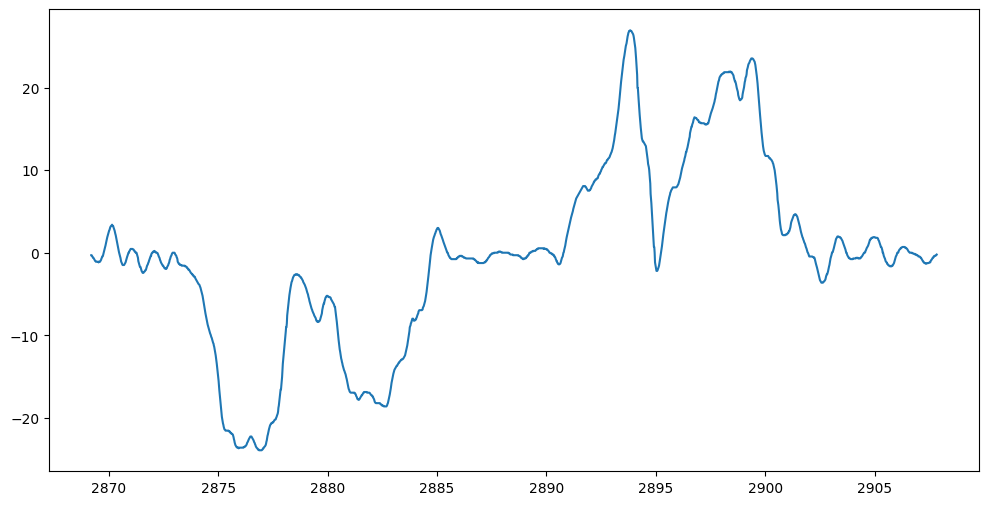

In [25]:
# Create the plot
plt.figure(figsize=(12,6))
plt.plot(time_column,driving_sim_df['steering_angle'])
plt.show()